Epoch 1/65
1/1 [==============================] - 1s 508ms/step - loss: 0.6932
Epoch 2/65
1/1 [==============================] - 0s 19ms/step - loss: 0.6926
Epoch 3/65
1/1 [==============================] - 0s 23ms/step - loss: 0.6921
Epoch 4/65
1/1 [==============================] - 0s 24ms/step - loss: 0.6916
Epoch 5/65
1/1 [==============================] - 0s 29ms/step - loss: 0.6911
Epoch 6/65
1/1 [==============================] - 0s 28ms/step - loss: 0.6906
Epoch 7/65
1/1 [==============================] - 0s 24ms/step - loss: 0.6902
Epoch 8/65
1/1 [==============================] - 0s 24ms/step - loss: 0.6897
Epoch 9/65
1/1 [==============================] - 0s 22ms/step - loss: 0.6892
Epoch 10/65
1/1 [==============================] - 0s 22ms/step - loss: 0.6888
Epoch 11/65
1/1 [==============================] - 0s 31ms/step - loss: 0.6883
Epoch 12/65
1/1 [==============================] - 0s 26ms/step - loss: 0.6879
Epoch 13/65
1/1 [==============================] - 0s 27ms/s

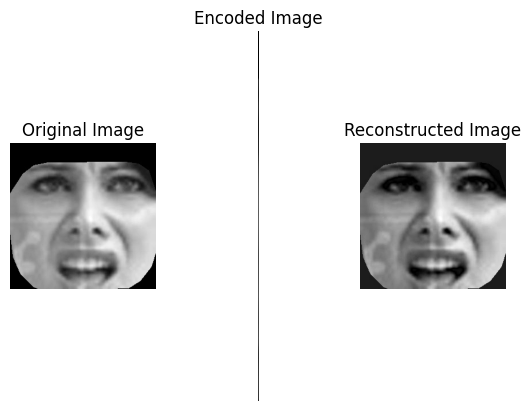

In [2]:
import numpy as np
import cv2
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the seed value for NumPy and TensorFlow random number generator
import random as rn
import os
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
rn.seed(39)
tf.random.set_seed(42)

# Load and preprocess the image data
img_path = "normalized.jpg"
img_width, img_height = 256, 256
num_channels = 1

# Load the image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Resize the image
img = cv2.resize(img, (img_width, img_height))

# Normalize the pixel values to be between 0 and 1
img = img / 255.0

# Reshape the image to have a single channel
img = img.reshape((img_width, img_height, num_channels))

# Define the encoding and decoding layers
encoding_dim = 32

input_img = Input(shape=(img_width, img_height, num_channels))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(num_channels, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model with an appropriate loss function and optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
x_train = x_test = np.array([img])
num_epochs = 65
batch_size = 1

autoencoder.fit(x_train, x_train,
                epochs=num_epochs,
                batch_size=batch_size,
                shuffle=False)

# Get the encoded representation of the image
encoder = Model(input_img, encoded)
encoded_img = encoder.predict(x_test)

# Get the reconstructed image
decoded_img = autoencoder.predict(x_test)

# Save the reconstructed image

# Display the original, encoded, and reconstructed images
plt.subplot(1, 3, 1)
plt.imshow(x_test[0].reshape(img_width, img_height), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(encoded_img.reshape((-1, encoding_dim)), cmap='gray')
plt.title('Encoded Image')
plt.axis('off')

plt.subplot(1, 3, 3)

plt.imshow(decoded_img[0].reshape(img_width, img_height), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

#  save using mpimg
mpimg.imsave('decoded.jpg', decoded_img[0].reshape(img_width, img_height), cmap='gray')
